In [1]:
pip install google-api-python-client


In [7]:
import requests

def get_stock_data(symbol, start_date, end_date, api_key):
    base_url = "https://www.alphavantage.co/query"
    function = "TIME_SERIES_DAILY"
    params = {
        "function": function,
        "symbol": symbol,
        "apikey": api_key,
        "outputsize": "full",  # Adjust as needed
        "datatype": "json",
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    return data["Time Series (Daily)"]

symbol = input("Enter the stock symbol: ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
api_key = "YOUR_ALPHAVANTAGE_API_KEY"  # Replace with your actual API key

data = get_stock_data(symbol, start_date, end_date, api_key)

# Print the data or perform other processing here
for date, values in data.items():
    print('Date: {}, Open: {}, High: {}, Low: {}, Close: {}'.format(
        date, values['1. open'], values['2. high'], values['3. low'], values['4. close']))


Streaming output truncated to the last 5000 lines.
Date: 2019-09-16, Open: 217.7300, High: 220.1300, Low: 217.5600, Close: 219.9000
Date: 2019-09-13, Open: 220.0000, High: 220.7900, Low: 217.0200, Close: 218.7500
Date: 2019-09-12, Open: 224.8000, High: 226.4200, Low: 222.8600, Close: 223.0900
Date: 2019-09-11, Open: 218.0700, High: 223.7100, Low: 217.7300, Close: 223.5900
Date: 2019-09-10, Open: 213.8600, High: 216.7800, Low: 211.7100, Close: 216.7000
Date: 2019-09-09, Open: 214.8400, High: 216.4400, Low: 211.0700, Close: 214.1700
Date: 2019-09-06, Open: 214.0500, High: 214.4200, Low: 212.5100, Close: 213.2600
Date: 2019-09-05, Open: 212.0000, High: 213.9700, Low: 211.5100, Close: 213.2800
Date: 2019-09-04, Open: 208.3900, High: 209.4800, Low: 207.3200, Close: 209.1900
Date: 2019-09-03, Open: 206.4300, High: 206.9800, Low: 204.2200, Close: 205.7000
Date: 2019-08-30, Open: 210.1600, High: 210.4500, Low: 207.2000, Close: 208.7400
Date: 2019-08-29, Open: 208.5000, High: 209.3200, Low: 206

Enter the stock symbol: AAPL
Enter the start date (YYYY-MM-DD): 2022-01-01
Enter the end date (YYYY-MM-DD): 2023-01-01
Mean Squared Error: 12.120158382486132
R-squared: 0.9994641953795501


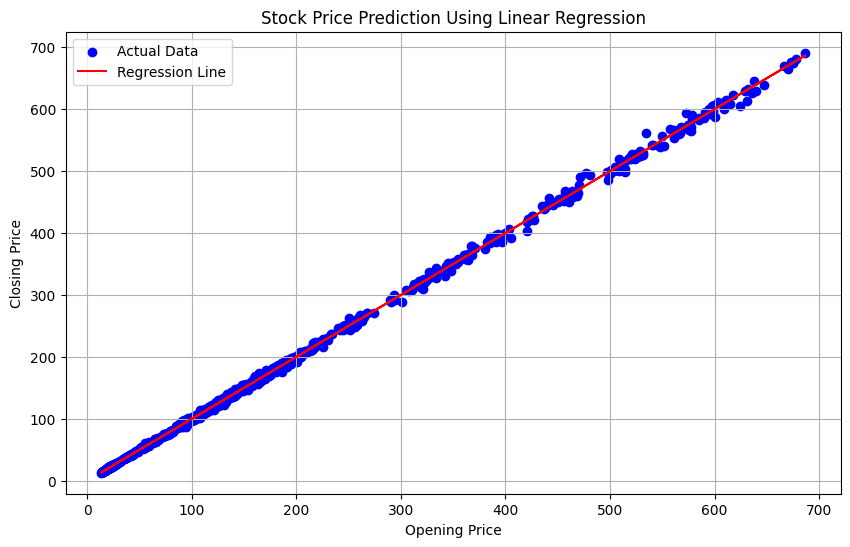

In [8]:
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to get stock data from Alpha Vantage API
def get_stock_data(symbol, start_date, end_date, api_key):
    base_url = "https://www.alphavantage.co/query"
    function = "TIME_SERIES_DAILY"
    params = {
        "function": function,
        "symbol": symbol,
        "apikey": api_key,
        "outputsize": "full",
        "datatype": "json",
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    return data["Time Series (Daily)"]

# User inputs
symbol = input("Enter the stock symbol: ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
api_key = "YOUR_ALPHAVANTAGE_API_KEY"  # Replace with your actual API key

# Fetch stock data using the API
data = get_stock_data(symbol, start_date, end_date, api_key)

# Lists to store opening and closing prices
opening_prices = []
closing_prices = []

# Extract opening and closing prices from data
for date, values in data.items():
    opening_prices.append(float(values['1. open']))
    closing_prices.append(float(values['4. close']))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(opening_prices, closing_prices, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit([[x] for x in X_train], y_train)

# Make predictions using the model
y_pred = model.predict([[x] for x in X_test])

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Stock Price Prediction Using Linear Regression')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()
